In [3]:
import pandas as pd

# Load the dataset using the correct file name
df = pd.read_csv("CartSaver_ImpulsePurchaseData.csv")

# Preview the first few rows
df.head()


,Customer_ID,Age,Gender,Product,Category,Price,Is_Impulse,Time,Date,Discount_Applied
0,aeec9a3b-5b27-48e5-ab07-86dbdab62b3d,39,Other,Toothpaste,Personal Care,42.14,1,22:53:48,2025-06-15,20
1,9cd6931c-677b-4119-9742-cd86a846f171,56,Male,Juice,Beverages,93.54,1,21:18:58,2025-06-16,0
2,cc789bd4-7832-471b-a1e1-eb028cc65542,48,Other,Toothpaste,Personal Care,120.51,0,15:08:44,2025-06-15,15
3,1d7a6b0e-eee4-4713-90a4-3fa5582f9ec2,31,Other,Tissue Paper,Household,224.37,0,00:36:08,2025-06-08,10
4,4817aafa-5740-4ac2-9a4d-5cf9e205b47d,60,Female,Yogurt,Dairy,131.50,1,10:53:11,2025-06-14,20


In [5]:
# Check shape and column names
print("Rows, Columns:", df.shape)
print("\nColumn Names:", df.columns)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' to time format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Create 'Hour' column from Time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Create 'Weekday' column from Date
df['Weekday'] = df['Date'].dt.day_name()

# Preview cleaned data
df.head()


Rows, Columns: (1000, 10)

Column Names: Index(['Customer_ID', 'Age', 'Gender', 'Product', 'Category', 'Price',
       'Is_Impulse', 'Time', 'Date', 'Discount_Applied'],
      dtype='object')

Missing Values:
 Customer_ID         0
Age                 0
Gender              0
Product             0
Category            0
Price               0
Is_Impulse          0
Time                0
Date                0
Discount_Applied    0
dtype: int64

Duplicate Rows: 0


,Customer_ID,Age,Gender,Product,Category,Price,Is_Impulse,Time,Date,Discount_Applied,Hour,Weekday
0,aeec9a3b-5b27-48e5-ab07-86dbdab62b3d,39,Other,Toothpaste,Personal Care,42.14,1,22:53:48,2025-06-15,20,22,Sunday
1,9cd6931c-677b-4119-9742-cd86a846f171,56,Male,Juice,Beverages,93.54,1,21:18:58,2025-06-16,0,21,Monday
2,cc789bd4-7832-471b-a1e1-eb028cc65542,48,Other,Toothpaste,Personal Care,120.51,0,15:08:44,2025-06-15,15,15,Sunday
3,1d7a6b0e-eee4-4713-90a4-3fa5582f9ec2,31,Other,Tissue Paper,Household,224.37,0,00:36:08,2025-06-08,10,0,Sunday
4,4817aafa-5740-4ac2-9a4d-5cf9e205b47d,60,Female,Yogurt,Dairy,131.50,1,10:53:11,2025-06-14,20,10,Saturday


In [7]:
# Save cleaned data
df.to_csv("CartSaver_Cleaned.csv", index=False)

print("✅ Cleaned file saved as 'CartSaver_Cleaned.csv'")


✅ Cleaned file saved as 'CartSaver_Cleaned.csv'


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\tiwar\AppData\Local\Temp\ipykernel_6064\1158342536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Is_Impulse'] == 1], x='Hour', palette='coolwarm')


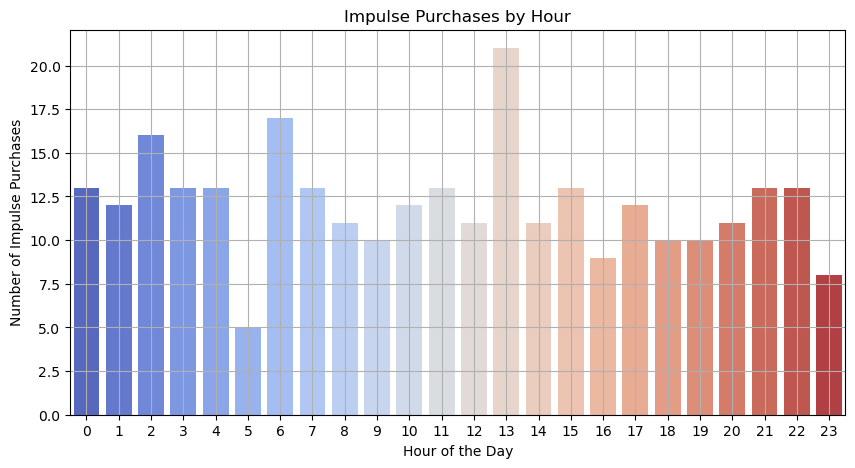

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Is_Impulse'] == 1], x='Hour', palette='coolwarm')
plt.title('Impulse Purchases by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Impulse Purchases')
plt.grid(True)
plt.show()


C:\Users\tiwar\AppData\Local\Temp\ipykernel_6064\1353742842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Is_Impulse'] == 1], x='Category', order=df['Category'].value_counts().index, palette='viridis')


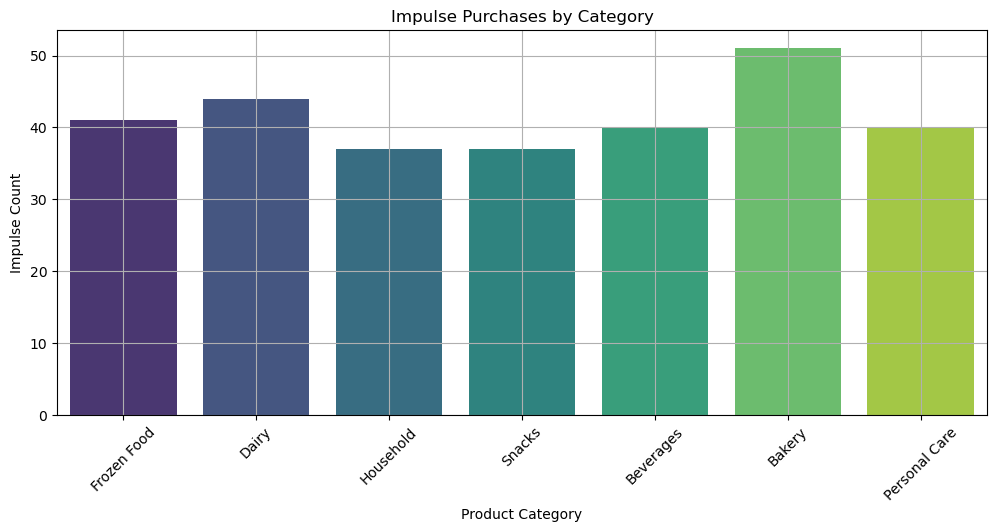

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(data=df[df['Is_Impulse'] == 1], x='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title('Impulse Purchases by Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Impulse Count')
plt.grid(True)
plt.show()


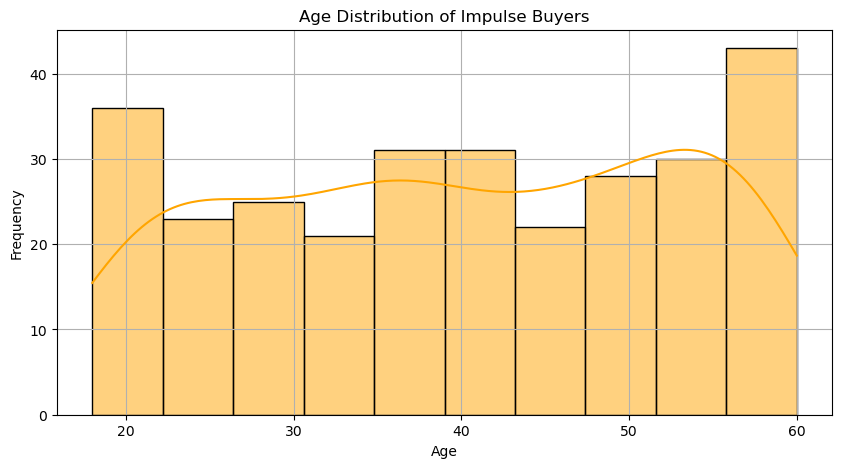

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Is_Impulse'] == 1]['Age'], bins=10, kde=True, color='orange')
plt.title('Age Distribution of Impulse Buyers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


C:\Users\tiwar\AppData\Local\Temp\ipykernel_6064\4072550478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Is_Impulse'] == 1], x='Gender', palette='Set2')


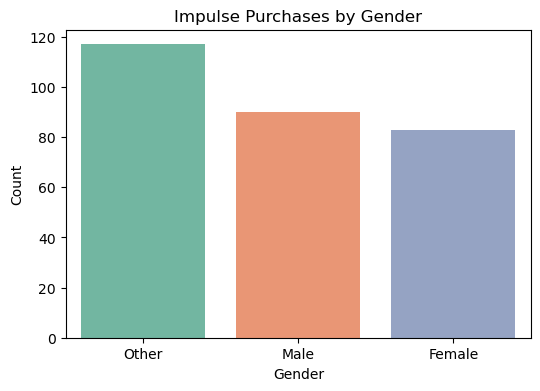

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df[df['Is_Impulse'] == 1], x='Gender', palette='Set2')
plt.title('Impulse Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
